# *BULANIK MANTIK ve PYTHON UYGULAMALARI* - Öğr. Gör Ali ÇETİNKAYA

***ISBN: *** 978-605-4827-98-5

## **Bölüm 9.2. Uygulama 2 Python Kod Uygulaması**


In [1]:
!pip install -U scikit-fuzzy # scikit-fuzzy kütüphanesinin kurumunu yapıyoruz.
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=4113cf0fa44d3605901e4f535bc620ba06c4ba8d07fcf5599dfd32dc7c415053
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
print("Numpy sürümü: ", np.__version__)
print("Scikit-fuzzy sürümü: ", fuzz.__version__)
print("Matplotlib sürümü: ", plt.matplotlib.__version__)

Numpy sürümü:  1.22.4
Scikit-fuzzy sürümü:  0.4.2
Matplotlib sürümü:  3.7.1


Servis Kalitesinin 0 ile 10 puan arasında oylayınız!!!!!!4
Yemek Kalitesini 0 ile 10 puan arasında oylayınız!!!!9


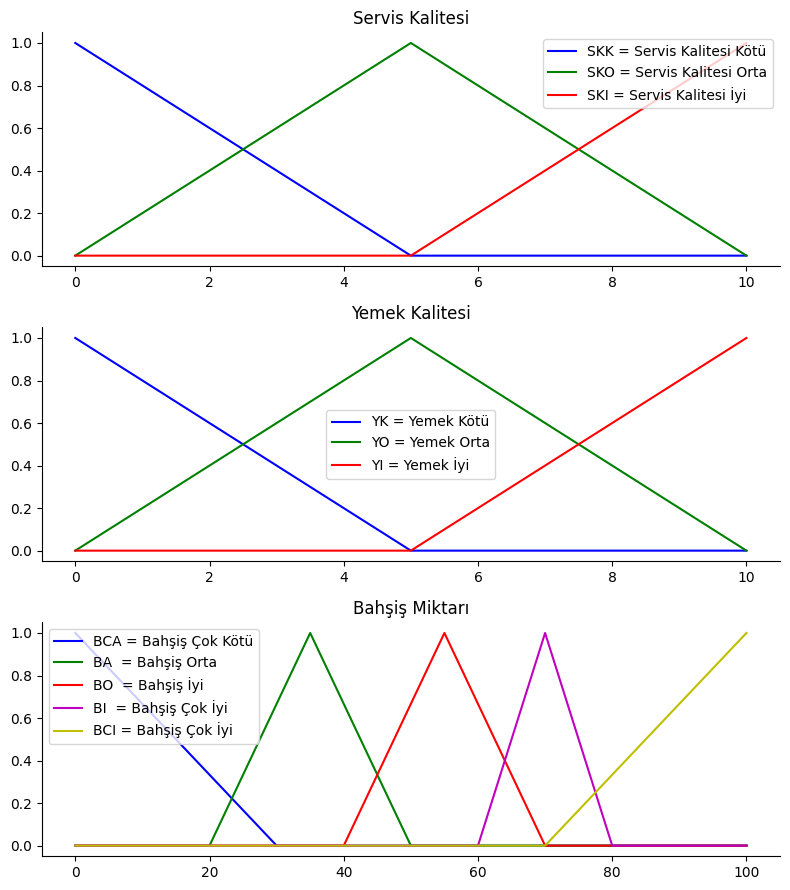

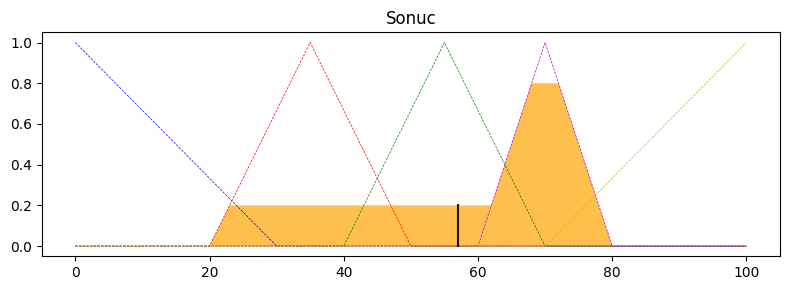

Bahşiş Miktarı =  57.019047619047605  TL


In [4]:
# Bulanık Sistem Oluşturuluyor
# Garson bahşiş uygulamasının tam kod hali

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

servis = np.arange(0, 11, 1)
yemek = np.arange(0, 11, 1)
bahsis = np.arange(0, 101, 1)

SKK = fuzz.trimf(servis, [0, 0, 5])
SKO = fuzz.trimf(servis, [0, 5, 10])
SKI = fuzz.trimf(servis, [5, 10, 10])

YK = fuzz.trimf(yemek, [0, 0, 5])
YO = fuzz.trimf(yemek, [0, 5, 10])
YI = fuzz.trimf(yemek, [5, 10, 10])

BCA = fuzz.trimf(bahsis, [0, 0, 30])
BA = fuzz.trimf(bahsis, [20, 35, 50])
BO = fuzz.trimf(bahsis, [40, 55, 70])
BI = fuzz.trimf(bahsis, [60, 70, 80])
BCI = fuzz.trimf(bahsis, [70, 100, 100])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(servis, SKK, 'b', linewidth=1.5, label='SKK = Servis Kalitesi Kötü')
ax0.plot(servis, SKO, 'g', linewidth=1.5, label='SKO = Servis Kalitesi Orta')
ax0.plot(servis, SKI, 'r', linewidth=1.5, label='SKI = Servis Kalitesi İyi')
ax0.set_title('Servis Kalitesi')
ax0.legend()

ax1.plot(yemek, YK, 'b', linewidth=1.5, label='YK = Yemek Kötü')
ax1.plot(yemek, YO, 'g', linewidth=1.5, label='YO = Yemek Orta')
ax1.plot(yemek, YI, 'r', linewidth=1.5, label='YI = Yemek İyi')
ax1.set_title('Yemek Kalitesi')
ax1.legend()

ax2.plot(bahsis, BCA, 'b', linewidth=1.5, label='BCA = Bahşiş Çok Kötü')
ax2.plot(bahsis, BA, 'g',  linewidth=1.5, label='BA  = Bahşiş Orta')
ax2.plot(bahsis, BO, 'r',  linewidth=1.5, label='BO  = Bahşiş İyi')
ax2.plot(bahsis, BI, 'm',  linewidth=1.5, label='BI  = Bahşiş Çok İyi ')
ax2.plot(bahsis, BCI, 'y', linewidth=1.5, label='BCI = Bahşiş Çok İyi')
ax2.set_title('Bahşiş Miktarı')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#kullanıcı girişleri
servis_puan = input('Servis Kalitesinin 0 ile 10 puan arasında oylayınız!!!!!!')
yemek_puan = input('Yemek Kalitesini 0 ile 10 puan arasında oylayınız!!!!')

servis_kotu = fuzz.interp_membership(servis, SKK, float(servis_puan))
servis_orta = fuzz.interp_membership(servis, SKO, float(servis_puan))
servis_iyi = fuzz.interp_membership(servis, SKI, float(servis_puan))

yemek_kotu = fuzz.interp_membership(yemek, YK, float(yemek_puan))
yemek_orta = fuzz.interp_membership(yemek, YO, float(yemek_puan))
yemek_iyi = fuzz.interp_membership(yemek, YI, float(yemek_puan))
#Kurallar uygulanıyor
#kural 1
Kural1 = np.fmin(servis_kotu,yemek_kotu)
Kontrol_kural1 = np.fmin(Kural1,BCA)
#kural 2
Kural2 = np.fmin(servis_kotu,yemek_orta)
Kontrol_kural2 = np.fmin(Kural2,BA)
#kural 3
Kural3 = np.fmin(servis_orta,yemek_orta)
Kontrol_kural3 = np.fmin(Kural3,BO)
#kural 4
Kural4 = np.fmin(servis_orta,yemek_iyi)
Kontrol_kural4 = np.fmin(Kural4,BI)
#kural 5
Kural5 = np.fmin(servis_iyi,yemek_kotu)
Kontrol_kural5 = np.fmin(Kural5,BCI)
#kural 6
Kural6 = np.fmin(servis_iyi,yemek_iyi)
Kontrol_kural6 = np.fmin(Kural6,BCI)

ctr0 = np.zeros_like(bahsis)

c1 = np.fmax(Kontrol_kural1,Kontrol_kural2)
c2 = np.fmax(Kontrol_kural3,Kontrol_kural4)
c3 = np.fmax(Kontrol_kural5,Kontrol_kural6)
c4 = np.fmax(c2,c3)

toplanan_kurallar = np.fmax(c1,c4)
durulama_islemi = fuzz.defuzz(bahsis, toplanan_kurallar, 'centroid')
islem_sonucu = fuzz.interp_membership(bahsis,toplanan_kurallar,durulama_islemi)

fig, ax4 = plt.subplots(figsize=(8,3))

ax4.plot(bahsis ,BCA,'b',linewidth=.5, linestyle='--')
ax4.plot(bahsis ,BA,'r',linewidth=.5, linestyle='--')
ax4.plot(bahsis ,BO,'g',linewidth=.5, linestyle='--')
ax4.plot(bahsis ,BI,'m',linewidth=.5, linestyle='--')
ax4.plot(bahsis ,BCI,'y',linewidth=.5, linestyle='--')

ax4.fill_between(bahsis,ctr0,toplanan_kurallar,facecolor='orange',alpha=0.7)
ax4.plot([durulama_islemi, durulama_islemi],[0,islem_sonucu],'k',linewidth=1.5,alpha=0.9)
ax4.set_title('Sonuc')
plt.tight_layout()
plt.show()

print ("Bahşiş Miktarı = " , durulama_islemi , " TL")


Kitabın Bulunduğu Sayfalar:

https://www.pandora.com.tr/kitap/bulanik-mantik-ve-python-uygulamalari/853298

https://www.kitapyurdu.com/kitap/bulanik-mantik-ve-python-uygulamalari/644153.html 

https://www.dr.com.tr/Kitap/Bulanik-Mantik-ve-Python-Uygulamalari/Egitim-Basvuru/Bilgisayar/urunno=0002035935001

https://kddb.gelisim.edu.tr/tr/idari-duyuru-igu-yayinlarindan-106-kitap-bulanik-mantik-ve-python-uygulamalari 


